In [9]:
#https://stackoverflow.com/questions/6949370/scipy-leastsq-dfun-usage
from scipy import optimize
import numpy
from random import random
from matplotlib import pyplot as plt, cm, colors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [47]:
#Define real coefficients
p_real=[3,0.5,2]

#Define functions
def func(p, x):         #Function
    return p[0]*numpy.exp(-p[1]*x)+p[2]

def dfunc(p, x, y):     #Derivative
    #print ('p', p)
    mat = np.array(list(map(lambda x : [numpy.exp(-p[1]*x),-x*p[0]*numpy.exp(-p[1]*x), 1], x)))
    #print ('df mat', mat)
    return mat

def residuals(p, x, y):
    res = func(p, x) - y
    #print ('residual', res)
    return res

x_vals = linspace(0, 10, 30)
y_vals = func(p_real,x_vals)
y_messy=y_vals + numpy.random.normal(size=len(y_vals)) * 0.1


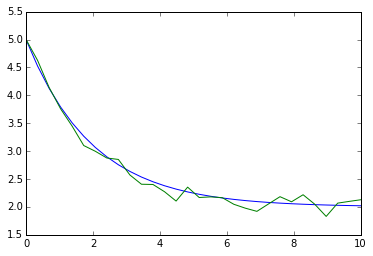

In [26]:
plt.plot(x_vals, y_vals)
plt.plot(x_vals, y_messy)

In [48]:
plsq,cov,infodict,mesg,ier = optimize.leastsq(residuals, [10,10,10], args=(x_vals, y_messy), Dfun=dfunc, col_deriv=False, full_output=True)

print (plsq, (plsq - p_real), mesg)

[ 2.9633496   0.4675742   1.97341401] [-0.0366504  -0.0324258  -0.02658599] Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


/usr/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


In [40]:
print optimize.leastsq.__doc__


    Minimize the sum of squares of a set of equations.

    ::

        x = arg min(sum(func(y)**2,axis=0))
                 y

    Parameters
    ----------
    func : callable
        should take at least one (possibly length N vector) argument and
        returns M floating point numbers.
    x0 : ndarray
        The starting estimate for the minimization.
    args : tuple
        Any extra arguments to func are placed in this tuple.
    Dfun : callable
        A function or method to compute the Jacobian of func with derivatives
        across the rows. If this is None, the Jacobian will be estimated.
    full_output : bool
        non-zero to return all optional outputs.
    col_deriv : bool
        non-zero to specify that the Jacobian function computes derivatives
        down the columns (faster, because there is no transpose operation).
    ftol : float
        Relative error desired in the sum of squares.
    xtol : float
        Relative error desired in the approximate sol